# Visualize Average of Word Vectors of Book descriptions using Principal Component Analysis

A method such as Principal Component Analysis (PCA) is normally implemented to reduce the dimensionality of word embedding. In short, PCA is a feature extraction technique — it combines the variables, and then it drops the least important variables while still retains the valuable parts of the variables

https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5

In [292]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()
import ast
from sklearn.metrics import multilabel_confusion_matrix
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from itertools import repeat

In [18]:
avg_word_vectors = pd.read_csv('book_embeddings_from_avg_word_vectors_small_dataset_shuffled.csv')

In [372]:
avg_word_vectors

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,0,0.000151,-0.000043,-0.000033,-0.000047,0.000073,0.000051,-0.000038,-0.000141,-7.786880e-07,...,0.000057,0.000069,-8.131270e-05,-9.992089e-05,-0.000264,0.000253,1.207221e-04,0.000020,-0.000156,-0.000052
1,1,-0.000001,0.000004,-0.000023,0.000045,-0.000003,-0.000116,-0.000104,0.000080,1.017722e-05,...,0.000133,0.000131,4.630161e-05,-7.433703e-05,-0.000189,0.000171,-1.494767e-05,0.000011,-0.000047,0.000137
2,2,0.000043,-0.000088,-0.000075,0.000221,-0.000019,-0.000124,0.000033,0.000153,4.487994e-05,...,0.000073,-0.000012,1.410478e-04,-1.079357e-04,-0.000224,0.000181,9.278940e-05,-0.000013,-0.000031,0.000181
3,3,-0.000012,0.000039,-0.000077,0.000017,-0.000151,0.000069,-0.000007,0.000052,-1.532857e-04,...,0.000116,0.000091,1.180168e-04,7.932742e-05,0.000091,0.000113,1.001334e-04,0.000099,-0.000206,0.000153
4,4,-0.000024,-0.000139,0.000083,0.000104,0.000102,-0.000029,0.000122,0.000037,4.912005e-05,...,0.000115,0.000106,-8.596065e-05,-5.664653e-05,-0.000073,0.000208,1.162188e-05,0.000073,-0.000080,0.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,0.000115,-0.000184,-0.000024,0.000154,0.000154,-0.000205,0.000143,0.000160,-8.128190e-05,...,0.000024,0.000045,6.808301e-05,2.404699e-07,-0.000280,0.000208,-1.165362e-05,-0.000049,-0.000180,0.000076
4326,4326,0.000179,-0.000034,0.000094,0.000226,-0.000106,-0.000132,-0.000012,0.000213,-9.041387e-05,...,0.000131,0.000085,1.440077e-04,2.647482e-05,-0.000202,0.000137,8.890698e-07,0.000086,-0.000061,0.000080
4327,4327,-0.000058,-0.000143,-0.000052,0.000005,0.000006,0.000010,-0.000085,0.000056,-7.454245e-05,...,0.000006,0.000035,5.372950e-07,-6.760813e-05,-0.000044,-0.000042,-5.097180e-05,0.000025,-0.000027,0.000086
4328,4328,0.000023,-0.000102,-0.000016,0.000139,0.000030,0.000061,-0.000077,-0.000084,-2.509894e-05,...,0.000189,-0.000014,4.276660e-05,-1.075213e-04,-0.000060,0.000100,2.754273e-05,0.000021,-0.000027,0.000146


In [373]:
small_books_dataset = pd.read_csv('unique_books.csv')

In [375]:
small_books_dataset = small_books_dataset.iloc[:,[9,12,13,15, 16, 17]]

In [376]:
small_books_dataset

,original_title,book_authors,book_desc,book_title,genres,book_desc_tok
0,The Millionaire Next Door: The Surprising Secr...,"['Thomas J. Stanley', 'William D. Danko']",The incredible national bestseller that is cha...,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...
1,The Da Vinci Code,['Dan Brown'],An ingenious code hidden in the works of Leona...,The Da Vinci Code,"['Fiction', 'Mystery', 'Thriller']",an ingenious code hidden in t...
2,Who Moved My Cheese?,"['Spencer Johnson', 'Kenneth H. Blanchard']","Written by Spencer Johnson, coauthor of The On...",Who Moved My Cheese?,"['Business', 'Self Help', 'Nonfiction', 'Psych...",written by spencer johnson ...
3,Memoirs of a Geisha,['Arthur Golden'],"A literary sensation and runaway bestseller, t...",Memoirs of a Geisha,"['Fiction', 'Historical', 'Historical Fiction'...",a literary sensation and runaway...
4,Heart of Darkness,['Joseph Conrad'],Dark allegory describes the narrator's journey...,Heart of Darkness,"['Classics', 'Fiction', 'Literature', 'Cultura...",dark allegory describes the narr...
...,...,...,...,...,...,...
4325,The Girl Before,['J.P. Delaney'],"In the tradition of The Girl on the Train, The...",The Girl Before,"['Thriller', 'Mystery', 'Fiction', 'Suspense',...",in the tradition of the girl ...
4326,Nutshell,['Ian McEwan'],Nutshell is a classic story of murder and dece...,Nutshell,"['Fiction', 'Contemporary', 'Mystery', 'Litera...",nutshell is a classic story o...
4327,"Short Stories from Hogwarts of Heroism, Hardsh...","['J.K. Rowling', 'MinaLima']",‘Minerva was the Roman goddess of warriors and...,"Short Stories from Hogwarts of Heroism, Hardsh...","['Fantasy', 'Short Stories', 'Fiction', 'Young...",minerva was the roman goddes...
4328,Behind Her Eyes,['Sarah Pinborough'],Why is everyone talking about the ending of Sa...,Behind Her Eyes,"['Thriller', 'Mystery', 'Fiction', 'Suspense',...",why is everyone talking about ...


In [377]:
small_books_dataset['book_authors'] = small_books_dataset['book_authors'].progress_apply(lambda x: ast.literal_eval(x))

  0%|          | 0/4330 [00:00<?, ?it/s]

/tmp/ipykernel_60190/1205010222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_books_dataset['book_authors'] = small_books_dataset['book_authors'].progress_apply(lambda x: ast.literal_eval(x))


## Get primary author

In [378]:
small_books_dataset['author1'] = small_books_dataset['book_authors'].progress_apply(lambda x: x[0])

  0%|          | 0/4330 [00:00<?, ?it/s]

/tmp/ipykernel_60190/2380591373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_books_dataset['author1'] = small_books_dataset['book_authors'].progress_apply(lambda x: x[0])


In [379]:
small_books_dataset['author1'].value_counts()

Stephen King       42
James Patterson    36
Terry Pratchett    34
Nora Roberts       32
Agatha Christie    25
                   ..
Eckhart Tolle       1
Pam Muñoz Ryan      1
Heather O'Neill     1
Alan W. Watts       1
Angie Thomas        1
Name: author1, Length: 2011, dtype: int64

In [381]:
small_books_dataset = small_books_dataset.reset_index()

In [382]:
small_books_dataset.head()

,index,original_title,book_authors,book_desc,book_title,genres,book_desc_tok,author1,authors_few
0,0,The Millionaire Next Door: The Surprising Secr...,"[Thomas J. Stanley, William D. Danko]",The incredible national bestseller that is cha...,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...,Thomas J. Stanley,
1,1,The Da Vinci Code,[Dan Brown],An ingenious code hidden in the works of Leona...,The Da Vinci Code,"['Fiction', 'Mystery', 'Thriller']",an ingenious code hidden in t...,Dan Brown,
2,2,Who Moved My Cheese?,"[Spencer Johnson, Kenneth H. Blanchard]","Written by Spencer Johnson, coauthor of The On...",Who Moved My Cheese?,"['Business', 'Self Help', 'Nonfiction', 'Psych...",written by spencer johnson ...,Spencer Johnson,
3,3,Memoirs of a Geisha,[Arthur Golden],"A literary sensation and runaway bestseller, t...",Memoirs of a Geisha,"['Fiction', 'Historical', 'Historical Fiction'...",a literary sensation and runaway...,Arthur Golden,
4,4,Heart of Darkness,[Joseph Conrad],Dark allegory describes the narrator's journey...,Heart of Darkness,"['Classics', 'Fiction', 'Literature', 'Cultura...",dark allegory describes the narr...,Joseph Conrad,


In [383]:
author_col_num = 7
authors_few_col_num = 8
small_books_dataset.loc[:,'authors_few'] = ''

for row in range(small_books_dataset.shape[0]):
    author = small_books_dataset.iloc[row,author_col_num]
    if author=='J.K. Rowling':
        small_books_dataset.iloc[row,-1] = 'J.K. Rowling'
    elif author== 'Dan Brown' :
        small_books_dataset.iloc[row,-1] = 'Dan Brown'
    elif author== 'Stephen King' :
        small_books_dataset.iloc[row,-1] = 'Stephen King'
    elif author== 'James Patterson' :
        small_books_dataset.iloc[row,-1] = 'James Patterson'
    elif author== 'Agatha Christie' :
        small_books_dataset.iloc[row,-1] = 'Agatha Christie'
    elif author== 'Nora Roberts' :
        small_books_dataset.iloc[row,-1] = 'Nora Roberts'

In [447]:
small_books_dataset

,index,original_title,book_authors,book_desc,book_title,genres,book_desc_tok,author1,authors_few,genres_simplified,genres_simplified2
0,0,The Millionaire Next Door: The Surprising Secr...,"[Thomas J. Stanley, William D. Danko]",The incredible national bestseller that is cha...,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...,Thomas J. Stanley,,Nonfiction,Business
1,1,The Da Vinci Code,[Dan Brown],An ingenious code hidden in the works of Leona...,The Da Vinci Code,"['Fiction', 'Mystery', 'Thriller']",an ingenious code hidden in t...,Dan Brown,Dan Brown,Fiction,Thriller or Mystery
2,2,Who Moved My Cheese?,"[Spencer Johnson, Kenneth H. Blanchard]","Written by Spencer Johnson, coauthor of The On...",Who Moved My Cheese?,"['Business', 'Self Help', 'Nonfiction', 'Psych...",written by spencer johnson ...,Spencer Johnson,,Nonfiction,Business
3,3,Memoirs of a Geisha,[Arthur Golden],"A literary sensation and runaway bestseller, t...",Memoirs of a Geisha,"['Fiction', 'Historical', 'Historical Fiction'...",a literary sensation and runaway...,Arthur Golden,,Fiction,Thriller or Mystery
4,4,Heart of Darkness,[Joseph Conrad],Dark allegory describes the narrator's journey...,Heart of Darkness,"['Classics', 'Fiction', 'Literature', 'Cultura...",dark allegory describes the narr...,Joseph Conrad,,Fiction,Thriller or Mystery
...,...,...,...,...,...,...,...,...,...,...,...
4325,4325,The Girl Before,[J.P. Delaney],"In the tradition of The Girl on the Train, The...",The Girl Before,"['Thriller', 'Mystery', 'Fiction', 'Suspense',...",in the tradition of the girl ...,J.P. Delaney,,Fiction,Thriller or Mystery
4326,4326,Nutshell,[Ian McEwan],Nutshell is a classic story of murder and dece...,Nutshell,"['Fiction', 'Contemporary', 'Mystery', 'Litera...",nutshell is a classic story o...,Ian McEwan,,Fiction,Thriller or Mystery
4327,4327,"Short Stories from Hogwarts of Heroism, Hardsh...","[J.K. Rowling, MinaLima]",‘Minerva was the Roman goddess of warriors and...,"Short Stories from Hogwarts of Heroism, Hardsh...","['Fantasy', 'Short Stories', 'Fiction', 'Young...",minerva was the roman goddes...,J.K. Rowling,J.K. Rowling,Fiction,Fantasy
4328,4328,Behind Her Eyes,[Sarah Pinborough],Why is everyone talking about the ending of Sa...,Behind Her Eyes,"['Thriller', 'Mystery', 'Fiction', 'Suspense',...",why is everyone talking about ...,Sarah Pinborough,,Fiction,Thriller or Mystery


In [57]:
#small_books_dataset = small_books_dataset.dropna(subset=['genres'])

In [385]:
small_books_dataset.iloc[0,:]['genres']

"['Economics', 'Finance', 'Nonfiction', 'Business', 'Finance', 'Personal Finance', 'Self Help', 'Currency', 'Money', 'Economics', 'Self Help', 'Personal Development', 'Psychology', 'Audiobook']"

## Create a new binary genre column that has categories 'Fiction' and 'Nonfiction'

In [388]:
genre_col_num = 5
small_books_dataset.loc[:,'genres_simplified'] = ''
genres_simpl_col_num = 9

for row in range(small_books_dataset.shape[0]):
    genres = small_books_dataset.iloc[row,genre_col_num]
    if type(genres)!=str:
        genres=''
    if 'Fiction' in genres:
        small_books_dataset.iloc[row,genres_simpl_col_num] = 'Fiction'
    elif 'Nonfiction' in genres:
        small_books_dataset.iloc[row,genres_simpl_col_num] = 'Nonfiction'


In [389]:
small_books_dataset.head()

,index,original_title,book_authors,book_desc,book_title,genres,book_desc_tok,author1,authors_few,genres_simplified
0,0,The Millionaire Next Door: The Surprising Secr...,"[Thomas J. Stanley, William D. Danko]",The incredible national bestseller that is cha...,The Millionaire Next Door: The Surprising Secr...,"['Economics', 'Finance', 'Nonfiction', 'Busine...",the incredible national bestseller ...,Thomas J. Stanley,,Nonfiction
1,1,The Da Vinci Code,[Dan Brown],An ingenious code hidden in the works of Leona...,The Da Vinci Code,"['Fiction', 'Mystery', 'Thriller']",an ingenious code hidden in t...,Dan Brown,Dan Brown,Fiction
2,2,Who Moved My Cheese?,"[Spencer Johnson, Kenneth H. Blanchard]","Written by Spencer Johnson, coauthor of The On...",Who Moved My Cheese?,"['Business', 'Self Help', 'Nonfiction', 'Psych...",written by spencer johnson ...,Spencer Johnson,,Nonfiction
3,3,Memoirs of a Geisha,[Arthur Golden],"A literary sensation and runaway bestseller, t...",Memoirs of a Geisha,"['Fiction', 'Historical', 'Historical Fiction'...",a literary sensation and runaway...,Arthur Golden,,Fiction
4,4,Heart of Darkness,[Joseph Conrad],Dark allegory describes the narrator's journey...,Heart of Darkness,"['Classics', 'Fiction', 'Literature', 'Cultura...",dark allegory describes the narr...,Joseph Conrad,,Fiction


## Create a new genre column that has categories 'Fantasy', 'Business' and 'Thriller or Mystery'

In [390]:
genre_col_num = 5
small_books_dataset.loc[:,'genres_simplified2'] = ''
genres_simpl_col_num_2 = 10

for row in small_books_dataset.index:
    genres = small_books_dataset.iloc[row,genre_col_num]
    if type(genres)!=str:
        genres=''
    if 'Fantasy' in genres:
        small_books_dataset.iloc[row,genres_simpl_col_num_2] = 'Fantasy'
    elif 'Business' in genres :
        small_books_dataset.iloc[row,genres_simpl_col_num_2] = 'Business'
    elif 'Thriller' in genres or 'Mystery in genres':
        small_books_dataset.iloc[row,genres_simpl_col_num_2] = 'Thriller or Mystery'

In [391]:
small_books_dataset.tail()

,index,original_title,book_authors,book_desc,book_title,genres,book_desc_tok,author1,authors_few,genres_simplified,genres_simplified2
4325,4325,The Girl Before,[J.P. Delaney],"In the tradition of The Girl on the Train, The...",The Girl Before,"['Thriller', 'Mystery', 'Fiction', 'Suspense',...",in the tradition of the girl ...,J.P. Delaney,,Fiction,Thriller or Mystery
4326,4326,Nutshell,[Ian McEwan],Nutshell is a classic story of murder and dece...,Nutshell,"['Fiction', 'Contemporary', 'Mystery', 'Litera...",nutshell is a classic story o...,Ian McEwan,,Fiction,Thriller or Mystery
4327,4327,"Short Stories from Hogwarts of Heroism, Hardsh...","[J.K. Rowling, MinaLima]",‘Minerva was the Roman goddess of warriors and...,"Short Stories from Hogwarts of Heroism, Hardsh...","['Fantasy', 'Short Stories', 'Fiction', 'Young...",minerva was the roman goddes...,J.K. Rowling,J.K. Rowling,Fiction,Fantasy
4328,4328,Behind Her Eyes,[Sarah Pinborough],Why is everyone talking about the ending of Sa...,Behind Her Eyes,"['Thriller', 'Mystery', 'Fiction', 'Suspense',...",why is everyone talking about ...,Sarah Pinborough,,Fiction,Thriller or Mystery
4329,4329,The Hate U Give,"[Angie Thomas, Angie Thomas]",Sixteen-year-old Starr Carter moves between tw...,The Hate U Give,"['Young Adult', 'Contemporary', 'Fiction', 'Re...",sixteen year old starr carter moves...,Angie Thomas,,Fiction,Thriller or Mystery


In [392]:
small_books_dataset.loc[:,'book_desc'][1]

'An ingenious code hidden in the works of Leonardo da Vinci.A desperate race through the cathedrals and castles of Europe.An astonishing truth concealed for centuries . . . unveiled at last.While in Paris, Harvard symbologist Robert Langdon is awakened by a phone call in the dead of the night. The elderly curator of the Louvre has been murdered inside the museum, his body covered in baffling symbols. As Langdon and gifted French cryptologist Sophie Neveu sort through the bizarre riddles, they are stunned to discover a trail of clues hidden in the works of Leonardo da Vinci—clues visible for all to see and yet ingeniously disguised by the painter.Even more startling, the late curator was involved in the Priory of Sion—a secret society whose members included Sir Isaac Newton, Victor Hugo, and Da Vinci—and he guarded a breathtaking historical secret. Unless Langdon and Neveu can decipher the labyrinthine puzzle—while avoiding the faceless adversary who shadows their every move—the explosi

In [393]:
small_books_dataset.groupby('genres_simplified2')['book_title'].count()

genres_simplified2
Business                 48
Fantasy                1406
Thriller or Mystery    2876
Name: book_title, dtype: int64

In [93]:
#What are the most common combinations of genres?

In [94]:
#order of genres
#more weight to higher order genres

class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

In [81]:
avg_word_vectors.shape

(4330, 769)

In [450]:
## Apply PCA on avg word vectors with 2 components

In [452]:
pca = PCA(n_components=2)

In [453]:
pca.fit(avg_word_vectors)

PCA(n_components=2)

In [454]:
avg_word_vectors_2D = pca.transform(avg_word_vectors)

In [455]:
axis1_data = avg_word_vectors_2D[:,0]
axis2_data = avg_word_vectors_2D[:,1]

In [456]:
#take some of the books and visualize genres somehow

In [457]:
colors = {'Fiction':'tab:pink', 'Nonfiction':'tab:green', '': 'tab:grey'}

No handles with labels found to put in legend.


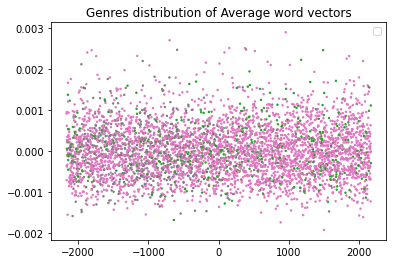

In [458]:
plt.scatter(x=axis1_data, y = axis2_data, color = genres_simp.map(colors), s = 2 )
plt.title('Genres distribution of Average word vectors')
plt.legend()
plt.show()

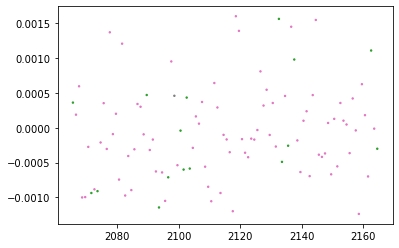

In [459]:
plt.scatter(x=axis1_data[:100], y = axis2_data[:100], color = genres_simp[:100].map(colors), s = 2 )

In [460]:
colors2 = {'Business':'tab:red', 'Thriller or Mystery':'tab:purple', 'Fantasy':'tab:green', '': 'tab:grey'}

In [461]:
axis1_data.shape

(4330,)

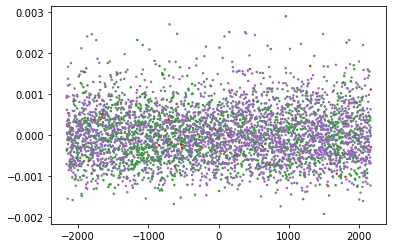

In [462]:
plt.scatter(x=axis1_data, y = axis2_data, color = small_books_dataset['genres_simplified2'].map(colors2), s = 2 ) 

In [463]:
condition = small_books_dataset['authors_few']!=''

In [464]:
colors_authors = {'J.K. Rowling':'tab:purple', 'Dan Brown': 'tab:brown', 'Stephen King': 'tab:red', 'James Patterson': 'tab:blue', 'Agatha Christie':'tab:orange', 'Nora Roberts': 'tab:pink', '':'w'}

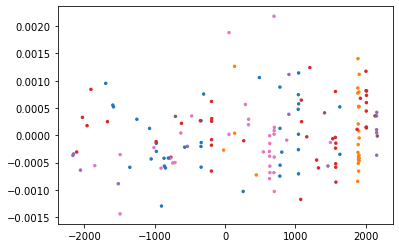

In [465]:
plt.scatter(x=axis1_data[condition], y = axis2_data[condition], color = small_books_dataset['authors_few'][condition].map(colors_authors), s = 6 ) 

In [466]:
paragraph_vectors = pd.read_csv('book_embeddings_from_paragraph_vectors_shuffled.csv')

In [467]:
paragraph_vectors_transformed = pca.transform(paragraph_vectors)

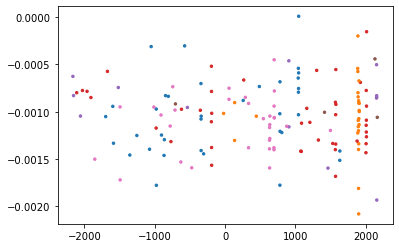

In [468]:
axis1_data_p = paragraph_vectors_transformed[:,0]
axis2_data_p = paragraph_vectors_transformed[:,1]
plt.scatter(x=axis1_data_p[condition], y = axis2_data_p[condition], color = small_books_dataset['authors_few'][condition].map(colors_authors), s = 6 ) 

In [469]:
bert_first10000 = pd.read_csv('book_embeddings_from_bert_10000_from_medium_dataset.csv')

In [470]:
bert_first10000

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,0,-0.990457,0.037981,0.404280,0.267100,-0.996528,0.015636,-0.554154,-1.386205,0.645037,...,0.468336,-0.399738,-1.011390,0.203159,-0.737675,-0.051711,0.584689,-0.295319,0.286119,-1.090723
1,1,-0.918620,0.711519,0.291019,-0.621044,-0.404256,-0.040231,-0.125465,-1.262079,0.355353,...,-0.338805,-0.415344,-1.076677,-0.239458,-1.013740,-0.847548,0.280273,0.132128,0.206063,-1.447768
2,2,-0.382267,-0.618793,-0.197889,0.262850,-1.010845,-0.167758,-0.137590,-1.376306,0.470116,...,-0.493913,-0.411224,-0.737494,-0.009022,-1.273119,-0.718541,0.696653,-0.583783,1.346992,0.076656
3,3,-0.329477,-0.385245,-0.134926,0.408924,-0.094419,-0.304918,-0.114631,-1.141965,0.025829,...,0.026461,0.178832,-0.961617,-0.831117,-1.049463,-0.771806,0.187316,-0.099313,0.279006,-0.309813
4,4,-0.727520,0.336582,0.655635,0.126367,-1.668989,0.315539,-0.280021,-1.411317,0.733493,...,0.202768,-0.133337,-1.110976,0.304031,-1.401962,-0.437232,0.061603,-0.300191,0.244138,-0.713983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,-0.713045,-0.610798,0.413637,0.012372,-0.226564,-0.218189,0.427757,-1.712402,0.476857,...,-0.083461,0.261477,-1.054670,0.193996,-0.297078,-0.856480,0.259145,-0.175090,0.599904,-0.341137
9996,9996,0.174429,-1.011310,0.014396,-0.451165,-0.807860,-0.118982,-0.105839,-1.648526,0.097988,...,0.110714,-0.088557,0.149752,0.389065,-1.451053,0.146622,-0.041929,-0.441007,0.825641,-0.211986
9997,9997,-0.981158,0.062758,0.937898,0.353263,-0.558163,-0.206096,-0.096176,-1.788688,0.317055,...,0.194839,-0.588665,-1.163446,0.376041,-0.747345,-0.242927,0.238110,0.172512,-0.467693,-1.110696
9998,9998,-0.586270,-0.535233,-0.077916,0.026238,-1.168476,-0.348383,-0.085764,-1.442113,0.276902,...,-0.131923,-0.645609,-0.554973,-0.261850,-1.119373,0.038485,0.275897,0.229055,0.417141,-0.237111


In [471]:
medium_dataset = pd.read_csv('medium_books_missing_obs23675').iloc[0:10000,[2,3,4,5]]
medium_dataset

,book_authors,book_desc,book_title,genres
0,"['J.K. Rowling', 'Mary GrandPré']",There is a door at the end of a silent corrido...,Harry Potter and the Order of the Phoenix,"['Fantasy', 'Young Adult', 'Fiction']"
1,['Stephenie Meyer'],About three things I was absolutely positive.F...,Twilight,"['Young Adult', 'Fantasy', 'Romance', 'Paranor..."
2,"['C.S. Lewis', 'Pauline Baynes']","Journeys to the end of the world, fantastic cr...",The Chronicles of Narnia,"['Fantasy', 'Classics', 'Fiction', 'Young Adul..."
3,['Margaret Mitchell'],Gone with the Wind is a novel written by Marga...,Gone with the Wind,"['Classics', 'Historical', 'Historical Fiction..."
4,['John Green'],Despite the tumor-shrinking medical miracle th...,The Fault in Our Stars,"['Young Adult', 'Fiction', 'Romance', 'Contemp..."
...,...,...,...,...
9995,['Isamu Fukui'],"\r\r\r\n\r\r\r\nIn an alternate world, in a na...",Truancy,"['Young Adult', 'Science Fiction', 'Dystopia',..."
9996,['Tracy Kidder'],Strength in What Remains is a wonderfully writ...,Strength in What Remains: A Journey of Remembr...,"['Nonfiction', 'Cultural', 'Africa', 'Biograph..."
9997,['Lene Kaaberbøl'],One look into the Shamer's eyes and a person's...,The Shamer's Signet,"['Fantasy', 'Young Adult', 'European Literatur..."
9998,['Tom Stoppard'],Culled from nearly 20 years of the playwright'...,The Real Inspector Hound and Other Plays,"['Plays', 'Drama', 'Fiction', 'Plays', 'Theatre']"


In [472]:
#bert_vectors = bert_vectors.drop(index=23675)

In [473]:
genre_col_num = 3
medium_dataset.loc[:,'genres_simplified'] = ''
new_col_num = 4 #medium_dataset.shape[1]

for row in range(medium_dataset.shape[0]):
    genres = medium_dataset.iloc[row,genre_col_num]
    if type(genres)!=str:
        genres=''
    if 'Fiction' in genres:
        medium_dataset.iloc[row,new_col_num] = 'Fiction'
    elif 'Nonfiction' in genres:
        medium_dataset.iloc[row,new_col_num] = 'Nonfiction'


In [474]:
medium_dataset

,book_authors,book_desc,book_title,genres,genres_simplified
0,"['J.K. Rowling', 'Mary GrandPré']",There is a door at the end of a silent corrido...,Harry Potter and the Order of the Phoenix,"['Fantasy', 'Young Adult', 'Fiction']",Fiction
1,['Stephenie Meyer'],About three things I was absolutely positive.F...,Twilight,"['Young Adult', 'Fantasy', 'Romance', 'Paranor...",Fiction
2,"['C.S. Lewis', 'Pauline Baynes']","Journeys to the end of the world, fantastic cr...",The Chronicles of Narnia,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...",Fiction
3,['Margaret Mitchell'],Gone with the Wind is a novel written by Marga...,Gone with the Wind,"['Classics', 'Historical', 'Historical Fiction...",Fiction
4,['John Green'],Despite the tumor-shrinking medical miracle th...,The Fault in Our Stars,"['Young Adult', 'Fiction', 'Romance', 'Contemp...",Fiction
...,...,...,...,...,...
9995,['Isamu Fukui'],"\r\r\r\n\r\r\r\nIn an alternate world, in a na...",Truancy,"['Young Adult', 'Science Fiction', 'Dystopia',...",Fiction
9996,['Tracy Kidder'],Strength in What Remains is a wonderfully writ...,Strength in What Remains: A Journey of Remembr...,"['Nonfiction', 'Cultural', 'Africa', 'Biograph...",Nonfiction
9997,['Lene Kaaberbøl'],One look into the Shamer's eyes and a person's...,The Shamer's Signet,"['Fantasy', 'Young Adult', 'European Literatur...",Fiction
9998,['Tom Stoppard'],Culled from nearly 20 years of the playwright'...,The Real Inspector Hound and Other Plays,"['Plays', 'Drama', 'Fiction', 'Plays', 'Theatre']",Fiction


In [475]:
genre_col_num = 3
medium_dataset.loc[:,'genres_simplified2'] = ''
new_col_num = 5 #medium_dataset.shape[1]+1

for row in range(medium_dataset.shape[0]):
    genres = medium_dataset.iloc[row,genre_col_num]
    if type(genres)!=str:
        genres=''
    if 'Fantasy' in genres:
        medium_dataset.iloc[row,new_col_num ] = 'Fantasy'
    elif 'Business' in genres :
        medium_dataset.iloc[row,new_col_num ] = 'Business'
    elif 'Thriller' in genres or 'Mystery in genres':
        medium_dataset.iloc[row,new_col_num ] = 'Thriller or Mystery'

In [476]:
medium_dataset.head()

,book_authors,book_desc,book_title,genres,genres_simplified,genres_simplified2
0,"['J.K. Rowling', 'Mary GrandPré']",There is a door at the end of a silent corrido...,Harry Potter and the Order of the Phoenix,"['Fantasy', 'Young Adult', 'Fiction']",Fiction,Fantasy
1,['Stephenie Meyer'],About three things I was absolutely positive.F...,Twilight,"['Young Adult', 'Fantasy', 'Romance', 'Paranor...",Fiction,Fantasy
2,"['C.S. Lewis', 'Pauline Baynes']","Journeys to the end of the world, fantastic cr...",The Chronicles of Narnia,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...",Fiction,Fantasy
3,['Margaret Mitchell'],Gone with the Wind is a novel written by Marga...,Gone with the Wind,"['Classics', 'Historical', 'Historical Fiction...",Fiction,Thriller or Mystery
4,['John Green'],Despite the tumor-shrinking medical miracle th...,The Fault in Our Stars,"['Young Adult', 'Fiction', 'Romance', 'Contemp...",Fiction,Thriller or Mystery


In [477]:
pca = PCA(n_components=2)

In [478]:
bert_vectors_transformed = pca.fit_transform(bert_first10000)

In [479]:
colors2 = {'Business':'red', 'Thriller or Mystery':'tab:purple', 'Fantasy':'green', '': 'tab:grey'}

In [480]:
axis1_data_b = bert_vectors_transformed[:,0]
axis2_data_b = bert_vectors_transformed[:,1]
 

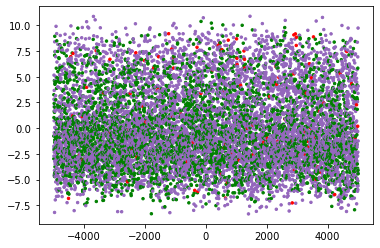

In [481]:
plt.scatter(x=axis1_data_b, y = axis2_data_b, color = medium_dataset['genres_simplified2'].map(colors2), s = 6 )

In [482]:
medium_dataset['book_authors'] = medium_dataset['book_authors'].progress_apply(lambda x: ast.literal_eval(x))

  0%|          | 0/10000 [00:00<?, ?it/s]

## Get primary author

In [483]:
medium_dataset['author1'] = medium_dataset['book_authors'].progress_apply(lambda x: x[0])

  0%|          | 0/10000 [00:00<?, ?it/s]

In [484]:
medium_dataset['author1'].value_counts()

Stephen King        47
Terry Pratchett     41
James Patterson     37
Meg Cabot           34
Rick Riordan        33
                    ..
Kōji Suzuki          1
Joe Simpson          1
Michelle Falkoff     1
Gordon Dahlquist     1
Audrey Wood          1
Name: author1, Length: 4623, dtype: int64

## Medium dataset: create new column with some of the popular authors in order to look for patterns

In [490]:
author_col_num = 6
medium_dataset.loc[:,'authors_few'] = ''
new_col_num=7

for row in range(medium_dataset.shape[0]):
    author = medium_dataset.iloc[row,author_col_num]
    if author=='Terry Pratchett':
        medium_dataset.iloc[row,new_col_num] = 'Terry Pratchett'
    elif author== 'Dan Brown' :
        medium_dataset.iloc[row,new_col_num] = 'Dan Brown'
    elif author== 'Stephen King' :
        medium_dataset.iloc[row,new_col_num] = 'Stephen King'
    elif author== 'James Patterson' :
        medium_dataset.iloc[row,new_col_num] = 'James Patterson'
    elif author== 'Agatha Christie' :
        medium_dataset.iloc[row,new_col_num] = 'Agatha Christie'
    elif author== 'Nora Roberts' :
        medium_dataset.iloc[row,new_col_num] = 'Nora Roberts'

In [488]:
medium_dataset['authors_few'].value_counts()

                   9818
Stephen King         47
Terry Pratchett      41
James Patterson      37
Nora Roberts         30
Agatha Christie      21
Dan Brown             6
Name: authors_few, dtype: int64

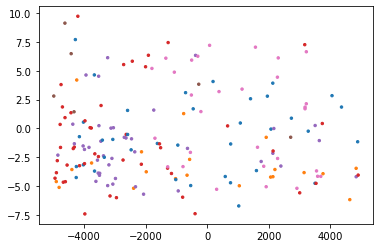

In [489]:
condition = medium_dataset['authors_few']!=''
colors_authors = {'Terry Pratchett':'tab:purple', 'Dan Brown': 'tab:brown', 'Stephen King': 'tab:red', 'James Patterson': 'tab:blue', 'Agatha Christie':'tab:orange', 'Nora Roberts': 'tab:pink', '':'w'}
plt.scatter(x=axis1_data_b[condition], y = axis2_data_b[condition], color = medium_dataset['authors_few'][condition].map(colors_authors), s = 6 ) 